In [48]:
import shutil
import os
if os.path.exists('/content/DL_Assignment2'):
  os.chdir('/content/')
  shutil.rmtree('/content/DL_Assignment2')
print(os.getcwd())

/content


In [49]:
!git clone https://github.com/BenjaminPhan34/DL_Assignment2

Cloning into 'DL_Assignment2'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 98 (delta 2), reused 94 (delta 1), pack-reused 0
Receiving objects: 100% (98/98), 30.18 MiB | 32.06 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [50]:
os.chdir('/content/DL_Assignment2')

In [51]:
import modelHW2
from keras.datasets import mnist
import numpy as np
import tensorflow as tf

In [52]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [53]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

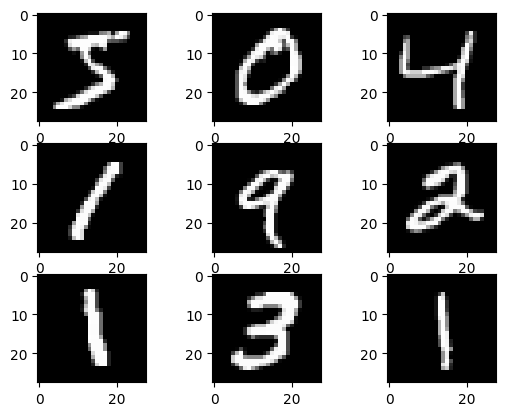

In [54]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [55]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [56]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

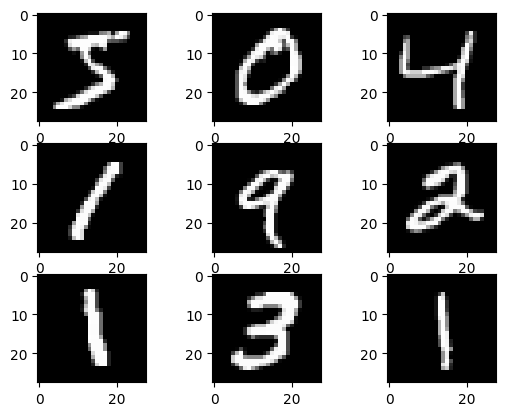

In [57]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [58]:
LR = 0.001

# DNN model

In [59]:
modelDNN = modelHW2.model_DNN(input_shape,num_classes,LR,64,32,16)

In [60]:
history = modelDNN.fit(train_images, train_labels, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 4ms/step - loss: 0.4549 - accuracy: 0.8637 - val_loss: 0.2075 - val_accuracy: 0.9398
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1809 - accuracy: 0.9464 - val_loss: 0.1624 - val_accuracy: 0.9514
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1474 - accuracy: 0.9563 - val_loss: 0.1427 - val_accuracy: 0.9589
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1323 - accuracy: 0.9600 - val_loss: 0.1470 - val_accuracy: 0.9577
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1217 - accuracy: 0.9633 - val_loss: 0.1309 - val_accuracy: 0.9638
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1146 - accuracy: 0.9651 - val_loss: 0.1278 - val_accuracy: 0.9638
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1074 - accuracy: 0.9683 - val_loss: 0.1235 - val_accuracy: 0.9648
Epoch 

In [61]:
modelDNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 28, 64)            1856      
                                                                 
 dense_8 (Dense)             (None, 28, 32)            2080      
                                                                 
 dense_9 (Dense)             (None, 28, 16)            528       
                                                                 
 flatten_3 (Flatten)         (None, 448)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                4490      
                                                                 
Total params: 8954 (34.98 KB)
Trainable params: 8954 (34.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step - loss: 0.1185 - accuracy: 0.9653
Test accuracy: 0.9653000235557556


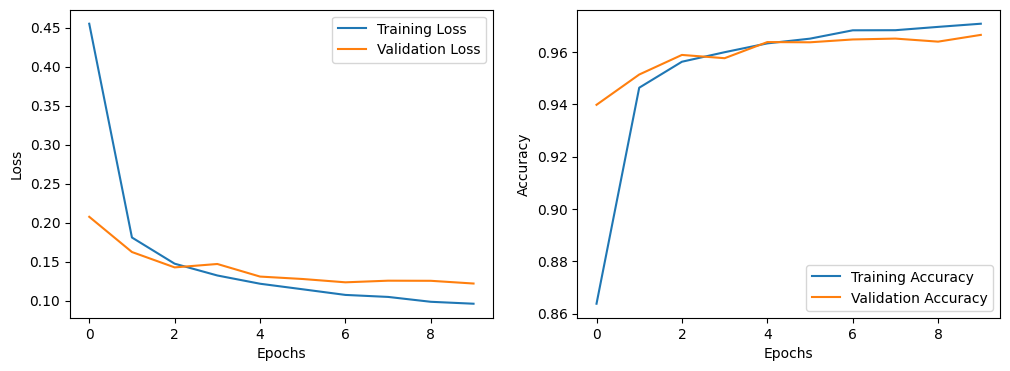

In [62]:

# Model evaluation
test_loss, test_accuracy = modelDNN.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Plot training history (loss and accuracy over epochs)
modelHW2.performance_visualization(history)

# ConvNet model

In [63]:
modelConvNet = modelHW2.model_ConvNet(input_shape,num_classes,LR,32,64,64)

In [64]:
modelConvNet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [65]:
history = modelConvNet.fit(train_images, train_labels, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.2242 - accuracy: 0.9329 - val_loss: 0.0878 - val_accuracy: 0.9710
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.0698 - val_accuracy: 0.9791
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0603 - val_accuracy: 0.9809
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0400 - val_accuracy: 0.9887
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0402 - val_accuracy: 0.9899
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0357 - val_accuracy: 0.9896
Epoch 

313/313 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9913
Test accuracy: 0.9912999868392944


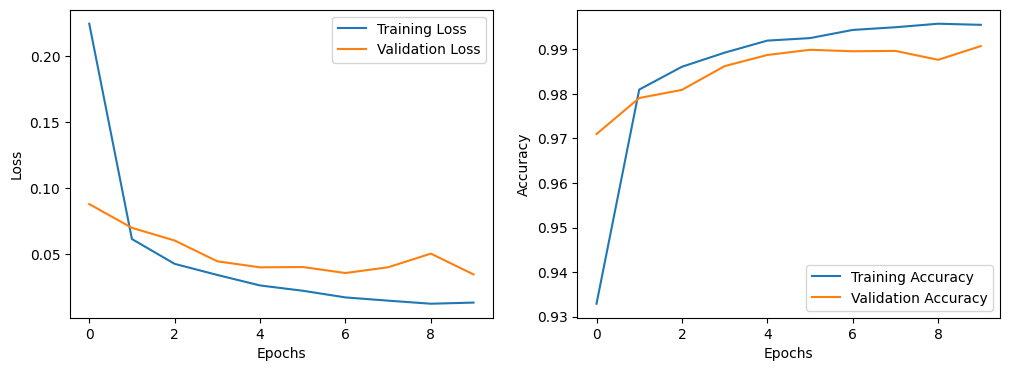

In [66]:

# Model evaluation
test_loss, test_accuracy = modelConvNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Plot training history (loss and accuracy over epochs)
modelHW2.performance_visualization(history)

# ResNet model

In [67]:
modelResNet = modelHW2.model_ResNet(input_shape,num_classes,3,LR)


In [68]:
modelResNet.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 26, 26, 64)           640       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_22 (Ba  (None, 26, 26, 64)           256       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_19 (Activation)  (None, 26, 26, 64)           0         ['batch_normalization_22

In [69]:
history = modelResNet.fit(train_images, train_labels, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 33s 24ms/step - loss: 0.1265 - accuracy: 0.9616 - val_loss: 0.0882 - val_accuracy: 0.9750
Epoch 2/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 0.3521 - val_accuracy: 0.9099
Epoch 3/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.1421 - val_accuracy: 0.9653
Epoch 4/10
750/750 [==============================] - 17s 23ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0582 - val_accuracy: 0.9849
Epoch 5/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0302 - accuracy: 0.9912 - val_loss: 0.0568 - val_accuracy: 0.9845
Epoch 6/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0419 - val_accuracy: 0.9872
Epoch 7/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0450 - val_accuracy:

313/313 [==============================] - 2s 6ms/step - loss: 0.0328 - accuracy: 0.9908
Test accuracy: 0.9908000230789185


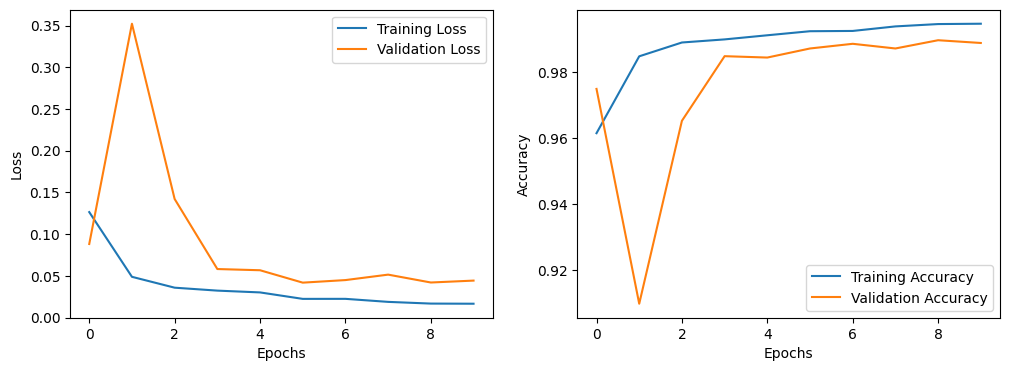

In [70]:
# Model evaluation
test_loss, test_accuracy = modelResNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Plot training history (loss and accuracy over epochs)
modelHW2.performance_visualization(history)

# Performance

## F1 Score

### DNN

313/313 [==============================] - 1s 3ms/step


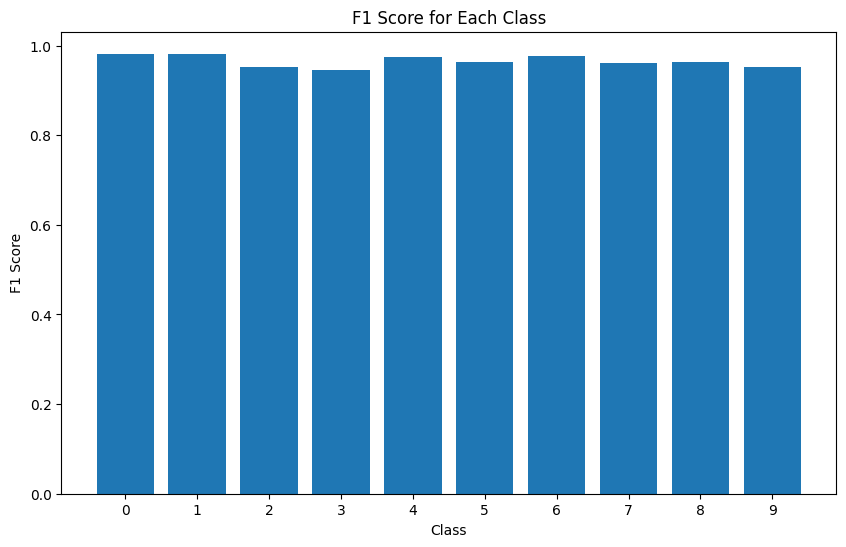

Macro-Average F1 Score: 0.965255080552337


In [71]:
# Make predictions on the test data
y_predDNN = modelDNN.predict(test_images)  # Replace 'test_data' with your actual test data

# Convert predicted probabilities to class labels (assuming argmax for simplicity)
predicted_labelsDNN = np.argmax(y_predDNN, axis=1)

# Plot F1 score
modelHW2.F1_visualization(test_labels,predicted_labelsDNN)

### ConvNet

313/313 [==============================] - 1s 3ms/step


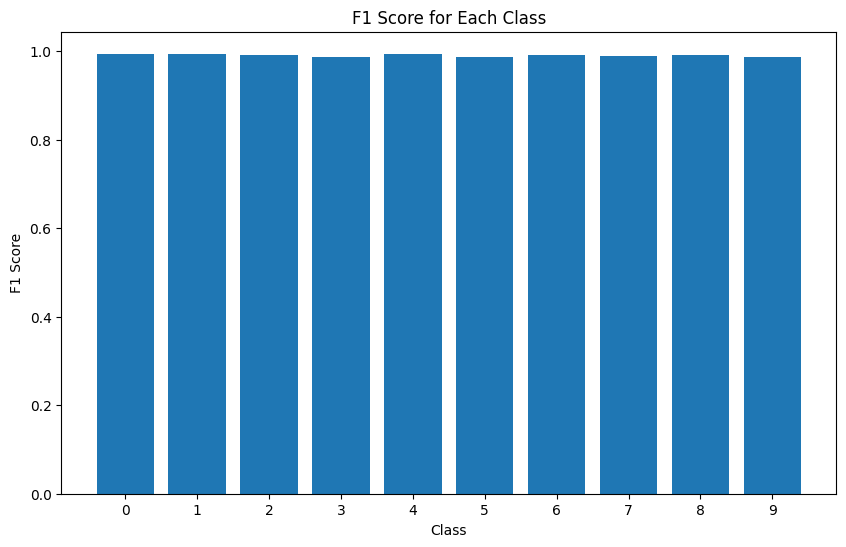

Macro-Average F1 Score: 0.9912464956203892


In [72]:
# Make predictions on the test data
y_predConvNet = modelConvNet.predict(test_images)  # Replace 'test_data' with your actual test data

# Convert predicted probabilities to class labels (assuming argmax for simplicity)
predicted_labelsConvNet = np.argmax(y_predConvNet, axis=1)

# Plot F1 score
modelHW2.F1_visualization(test_labels,predicted_labelsConvNet)

### ResNet

313/313 [==============================] - 2s 4ms/step


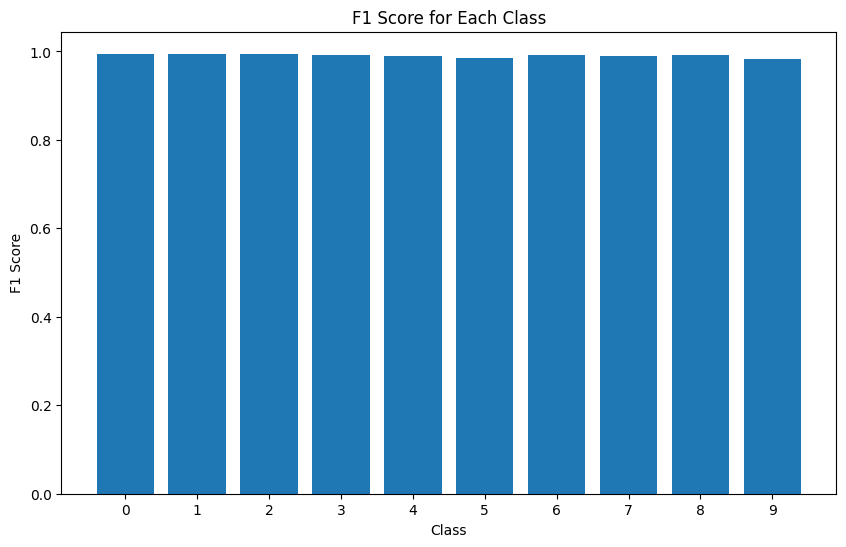

Macro-Average F1 Score: 0.9906932120660507


In [73]:
# Make predictions on the test data
y_predResNet = modelResNet.predict(test_images)  # Replace 'test_data' with your actual test data

# Convert predicted probabilities to class labels (assuming argmax for simplicity)
predicted_labelsResNet = np.argmax(y_predResNet, axis=1)

# Plot F1 score
modelHW2.F1_visualization(test_labels,predicted_labelsResNet)

## ROC AUC Score

### DNN

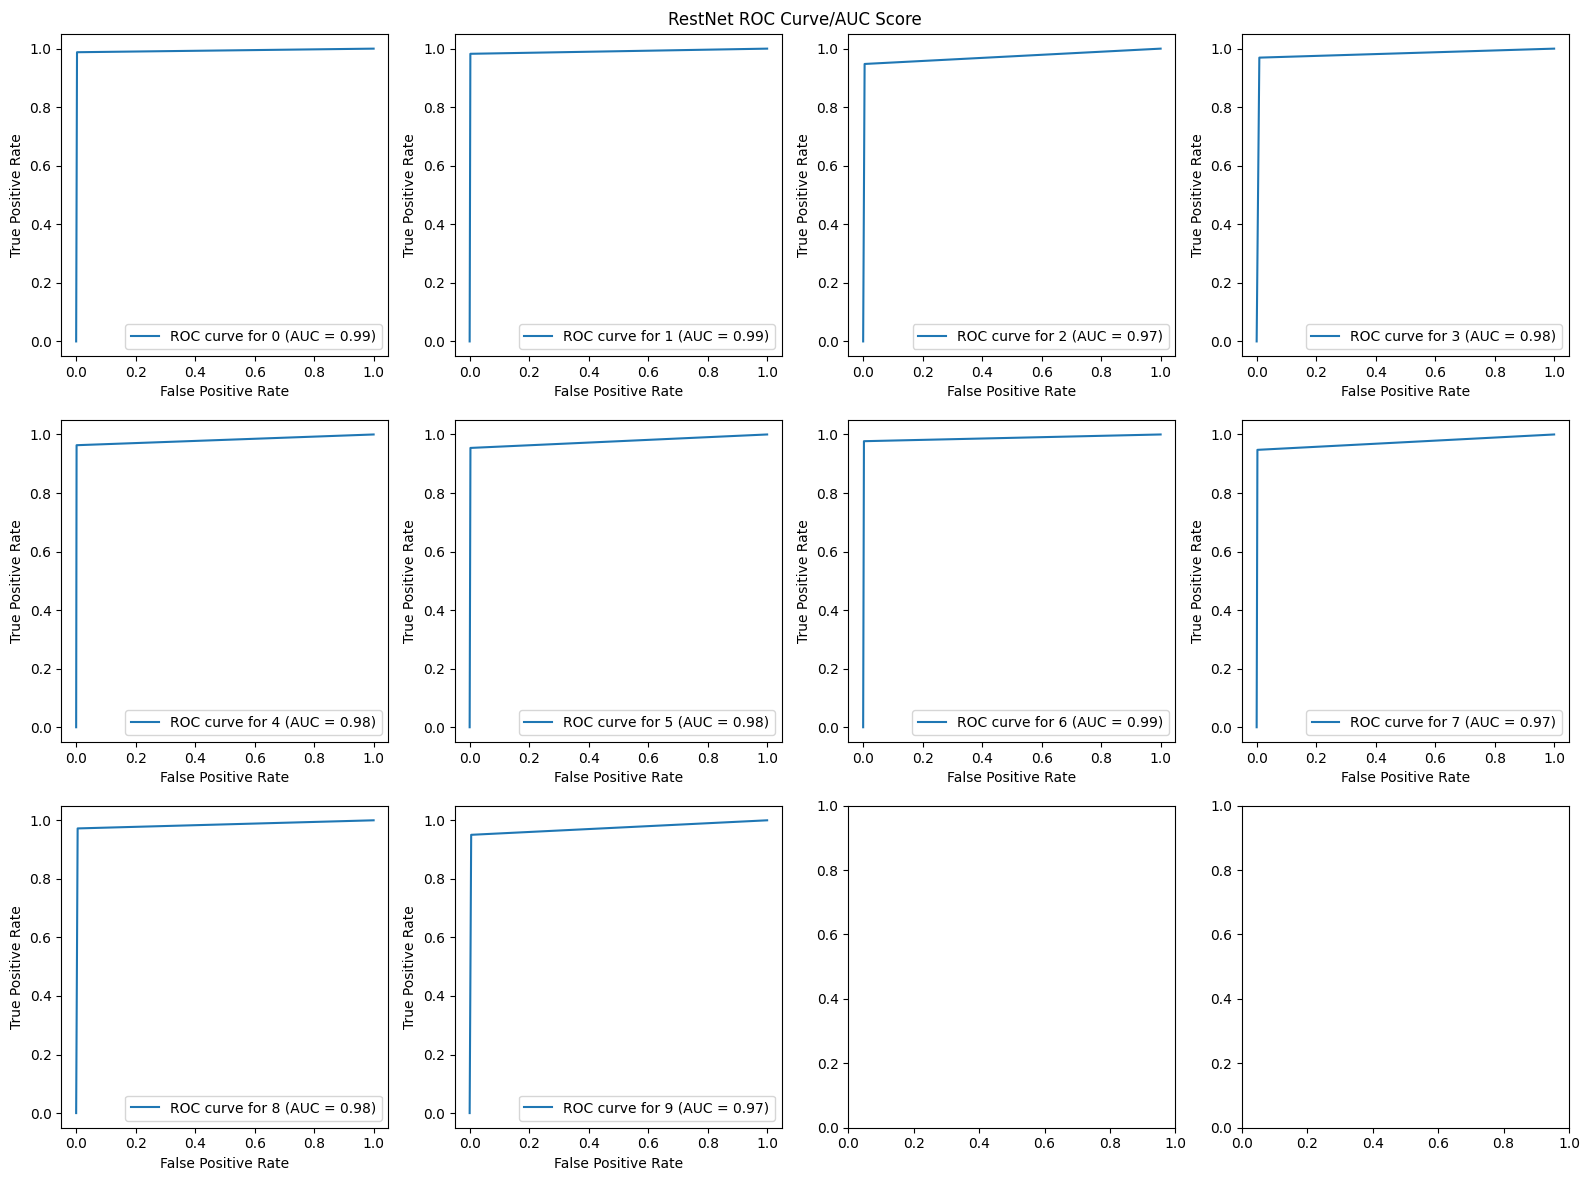

In [74]:
modelHW2.ROC_AUC_visualization(test_labels,predicted_labelsDNN)

### ConvNet

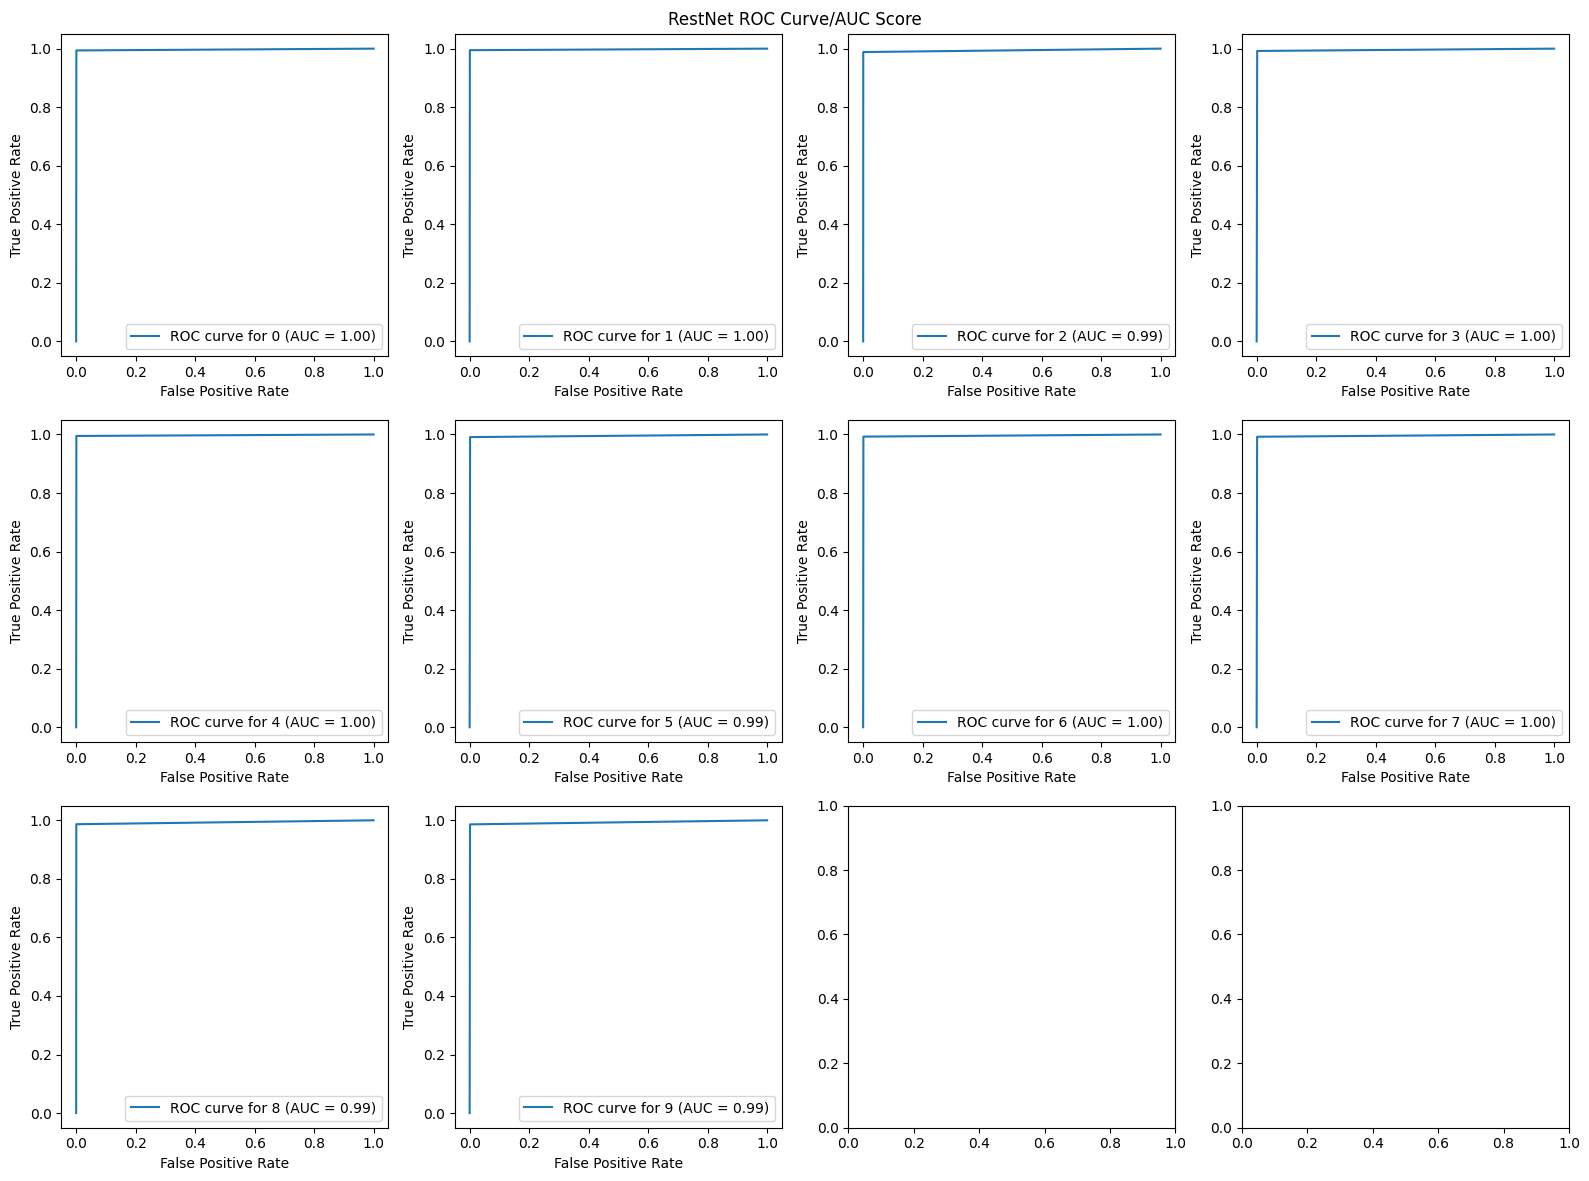

In [75]:
modelHW2.ROC_AUC_visualization(test_labels,predicted_labelsConvNet)

### ResNet

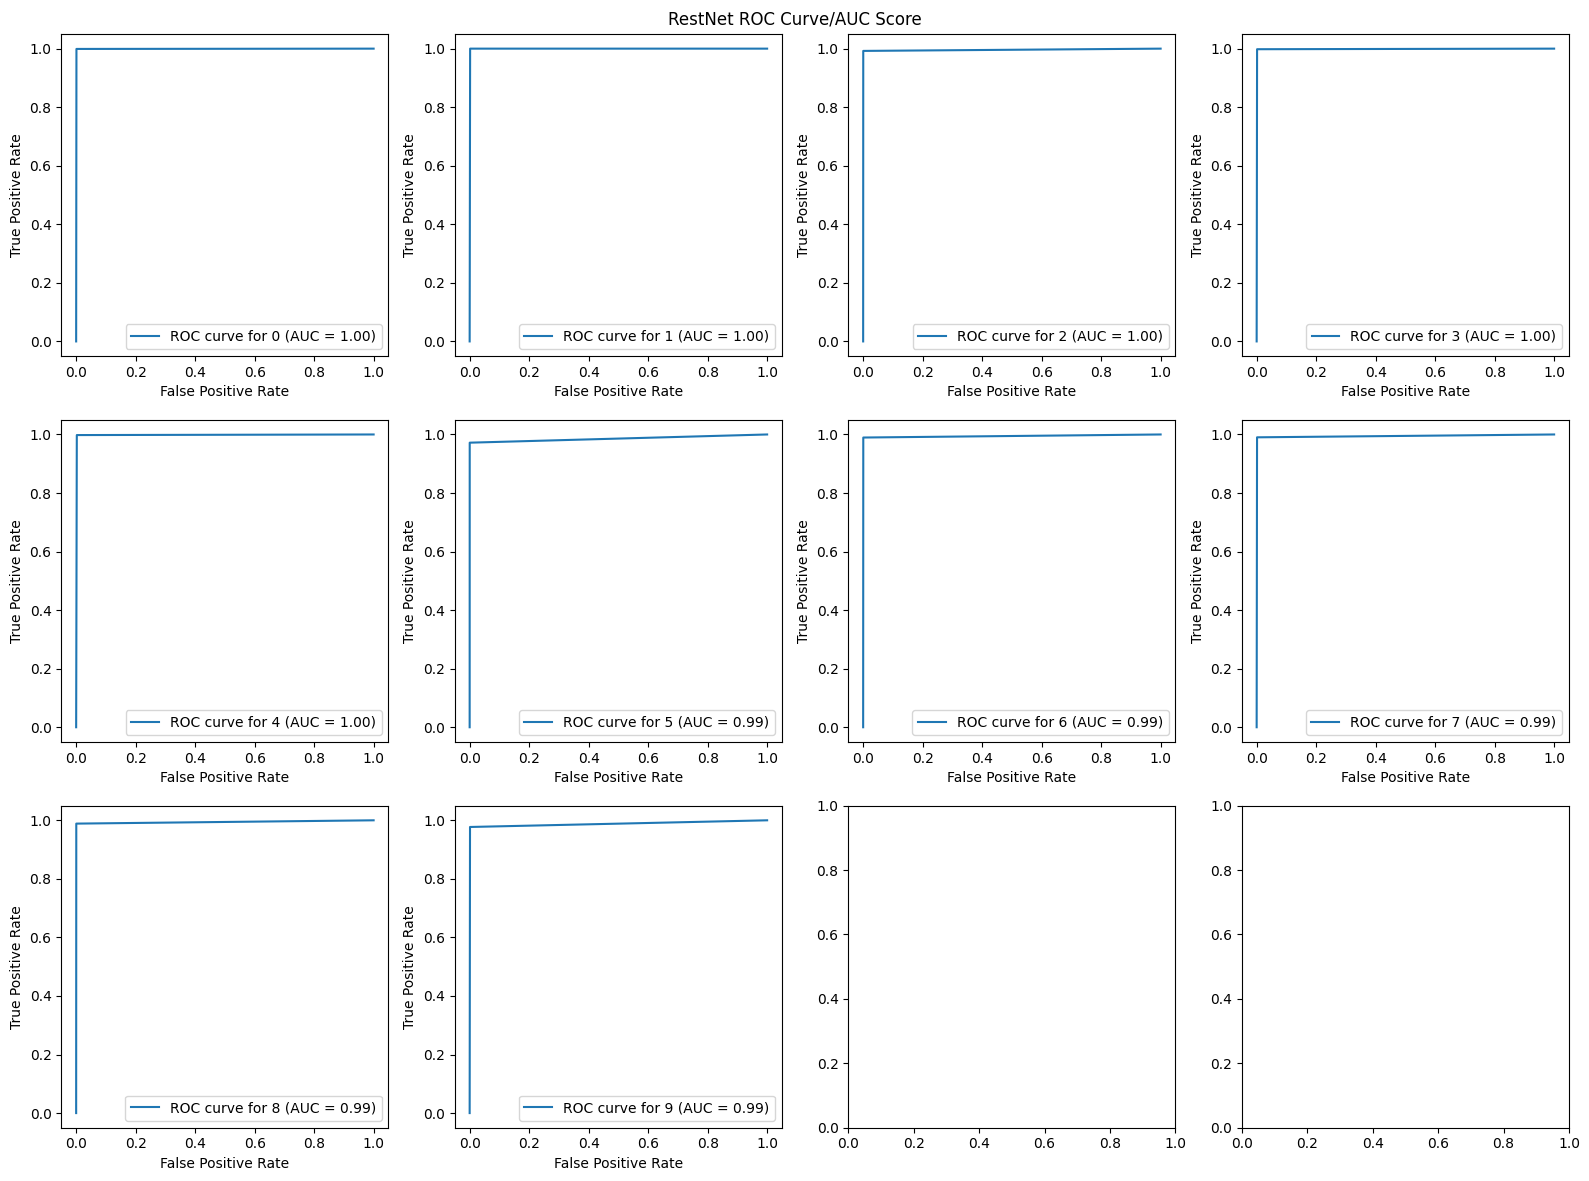

In [76]:
modelHW2.ROC_AUC_visualization(test_labels,predicted_labelsResNet)

# Feature visualization

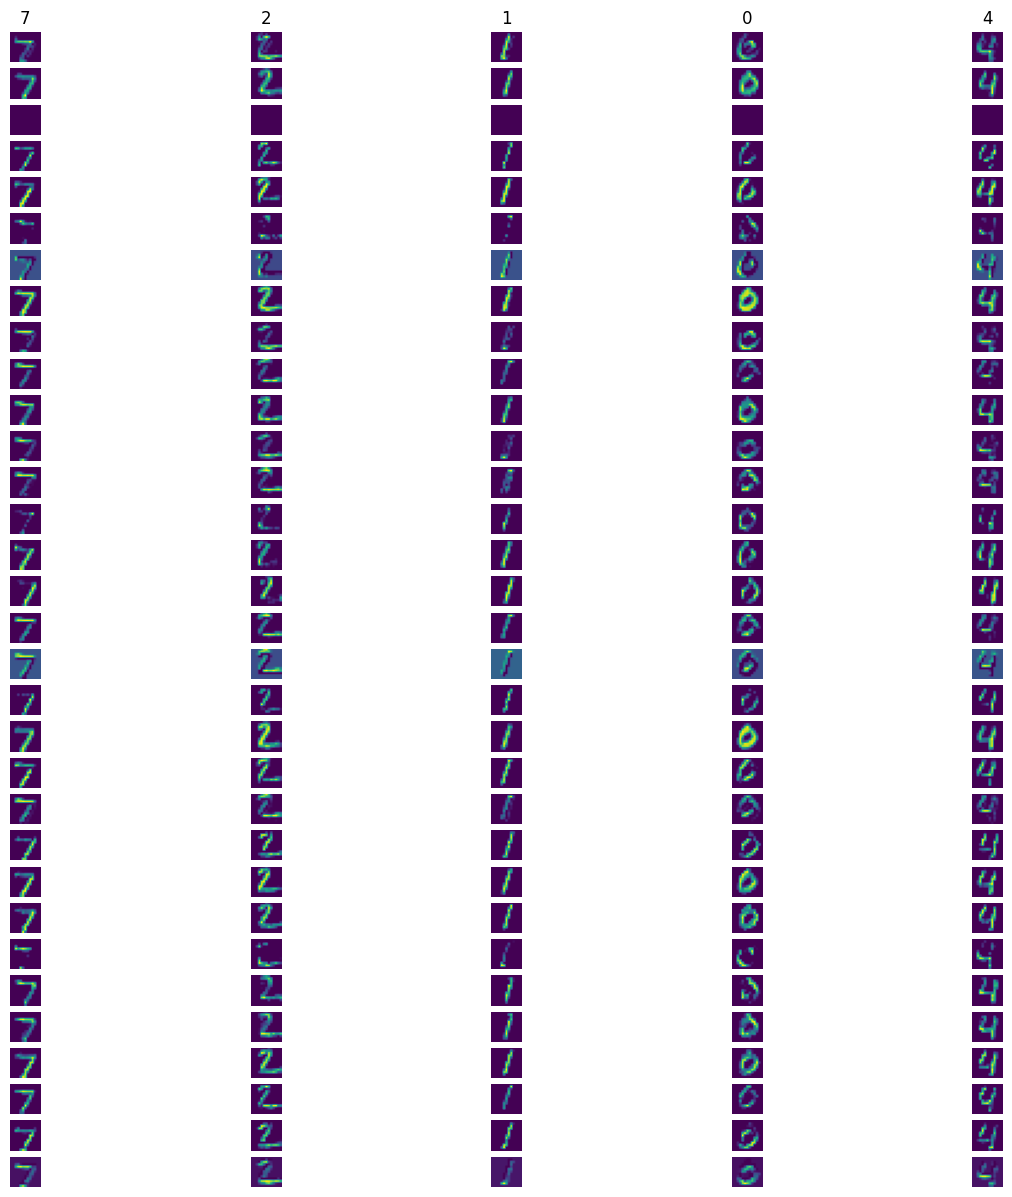

In [77]:
modelHW2.feature_visualization(modelConvNet , 1, test_images[:5], test_labels[:5])

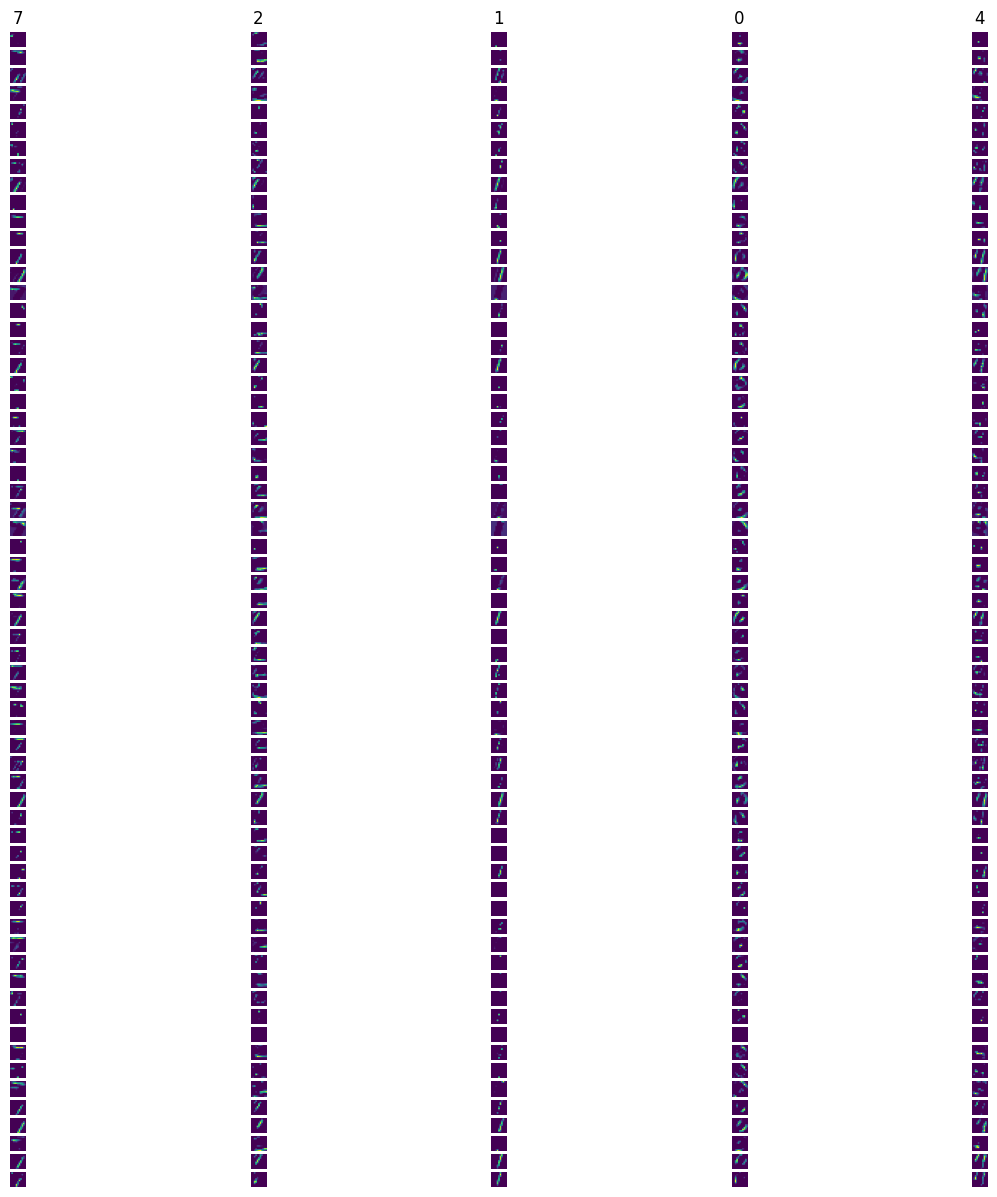

In [78]:
modelHW2.feature_visualization(modelConvNet , 2, test_images[:5], test_labels[:5])

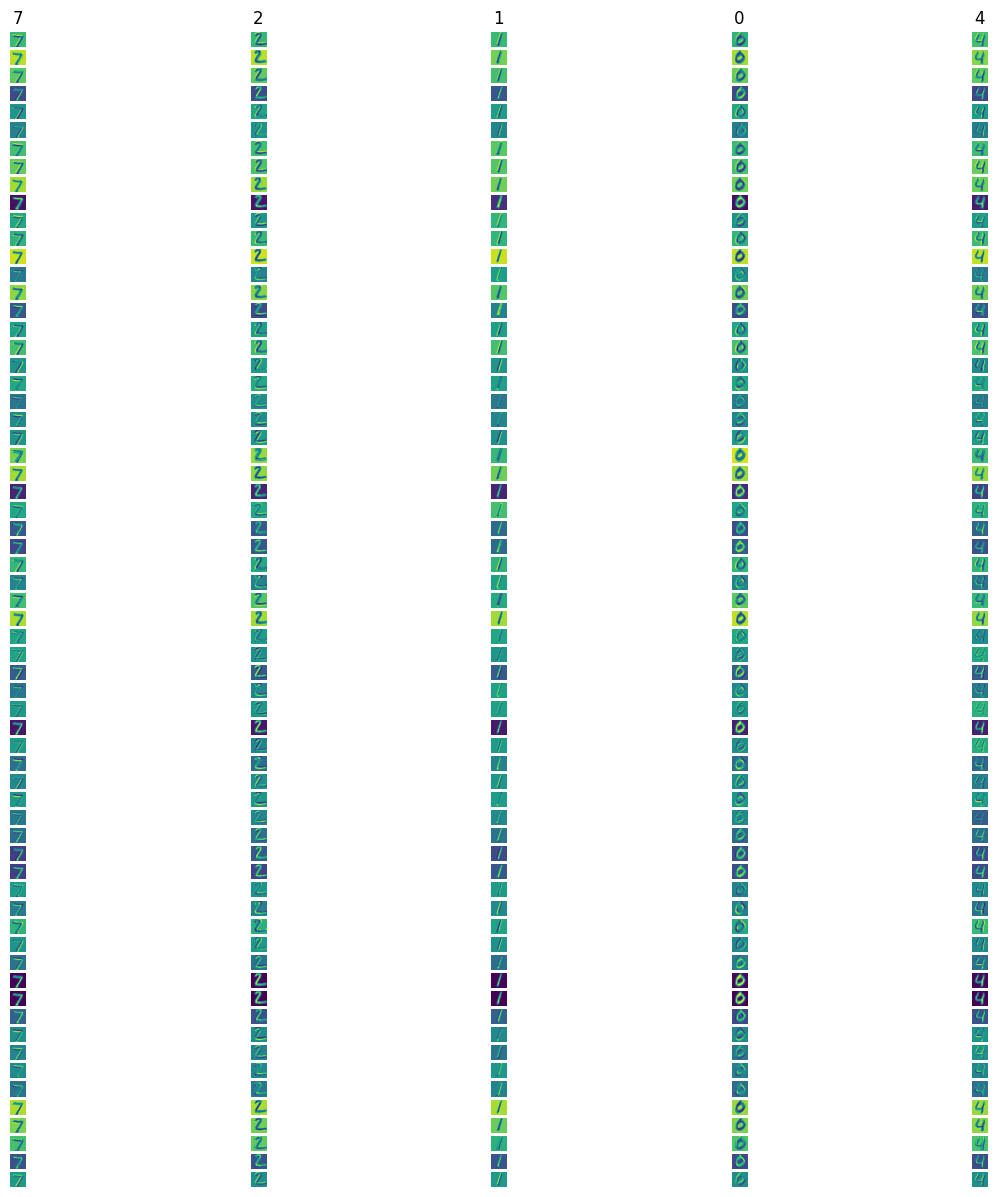

In [79]:
modelHW2.feature_visualization(modelResNet , 1, test_images[:5], test_labels[:5])

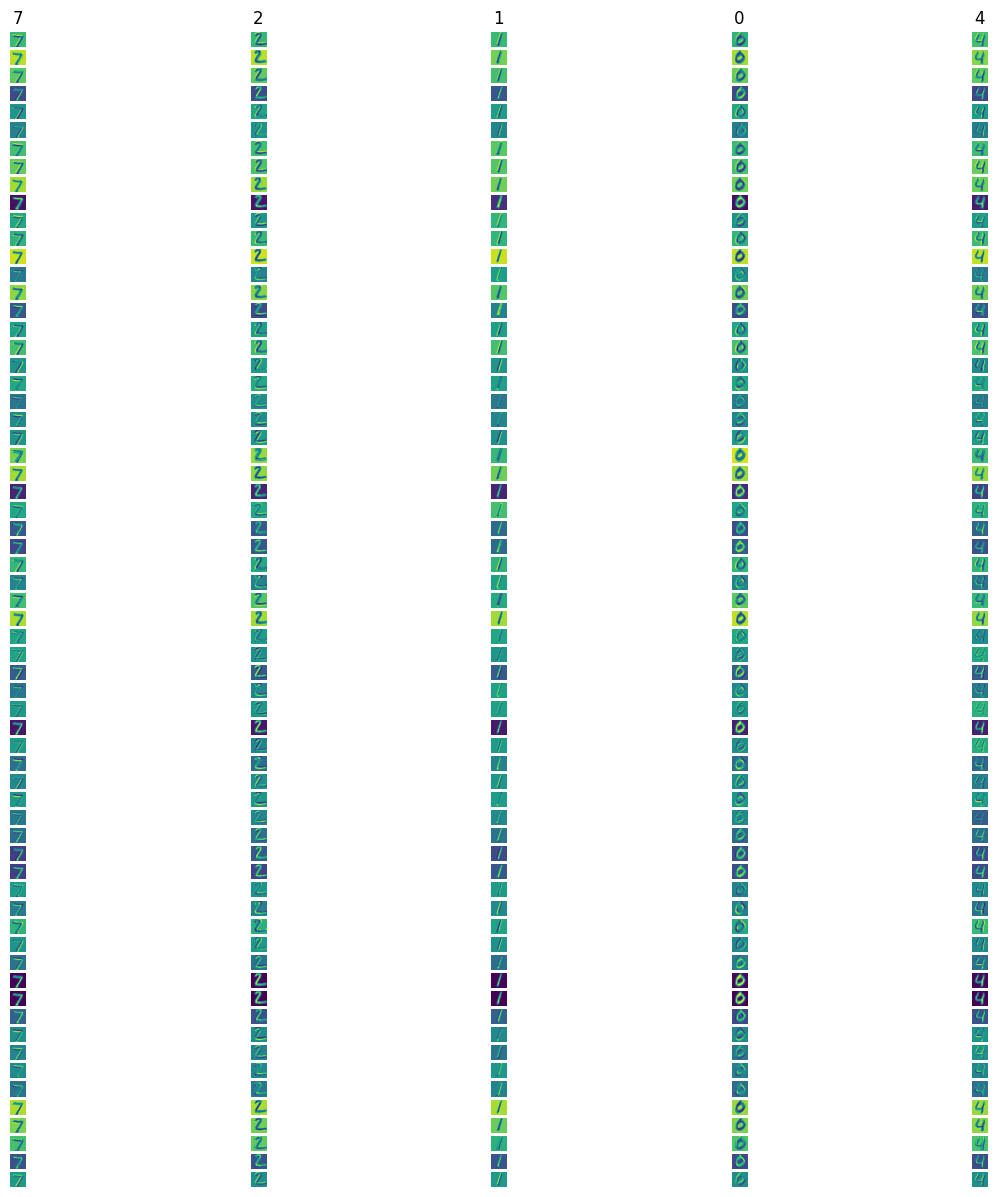

In [80]:
modelHW2.feature_visualization(modelResNet , 2, test_images[:5], test_labels[:5])

# Save mode

This section is made to save a model if I find a better performance

In [89]:
#modelHW2.save_model("modelDNN", modelDNN)

In [83]:
#modelHW2.save_model("modelConvNet", modelConvNet)

In [84]:
#modelHW2.save_model("modelResNet", modelResNet)

# Best model performance achieved for each model

In [90]:
model_loaded = modelHW2.load_model("modelDNN.keras")
# Model evaluation
test_loss, test_accuracy = model_loaded.evaluate(test_images, test_labels)
print(f'Best model for DNN | Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.1185 - accuracy: 0.9653
Best model for DNN | Test accuracy: 0.9653000235557556


In [86]:
model_loaded = modelHW2.load_model("modelConvNet.keras")
# Model evaluation
test_loss, test_accuracy = model_loaded.evaluate(test_images, test_labels)
print(f'Best model for ConvNet | Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9914
Best model for ConvNet | Test accuracy: 0.9914000034332275


In [87]:
model_loaded = modelHW2.load_model("modelResNet.keras")
# Model evaluation
test_loss, test_accuracy = model_loaded.evaluate(test_images, test_labels)
print(f'Best model for ResNet | Test accuracy: {test_accuracy}')

313/313 [==============================] - 3s 7ms/step - loss: 0.0281 - accuracy: 0.9922
Best model for ResNet | Test accuracy: 0.9922000169754028
